In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [71]:
local_df = pd.read_csv("../measurements/local_long/map.csv")



jpeg_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
jpeg_time_df = pd.read_csv("../measurements/real_bw_test_15fps/time.csv")


high_jpeg_cha_df = pd.read_csv("../measurements/static_test_15fps/characteristic.csv")
high_jpeg_time_df = pd.read_csv("../measurements/static_test_15fps/time.csv")

low_jpeg_cha_df = pd.read_csv("../measurements/static_test_low/characteristic.csv")
low_jpeg_time_df = pd.read_csv("../measurements/static_test_low/time.csv")

In [72]:
high_jpeg_time_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time
0,0,100,1,6000000.0,0.3,1,252.655579,4.630848,101.460445,0.029696,17.349504,54.011490,0.057856,431.725006
1,0,100,1,6000000.0,0.3,2,9.926496,4.584224,0.989888,0.032768,16.171583,4.169728,0.095232,35.287521
2,0,100,1,6000000.0,0.3,3,9.905120,4.447936,1.143904,0.031872,15.864160,4.328128,0.062464,35.928223
3,0,100,1,6000000.0,0.3,4,9.908032,4.643168,1.082144,0.081088,17.271616,4.558272,0.114560,36.925282
4,0,100,1,6000000.0,0.3,5,9.940960,4.523872,1.410080,0.029696,15.461408,5.361056,0.055424,36.678944


In [73]:
jpeg_time_df["transmission_time"] = jpeg_cha_df["datasize_est"]*8/jpeg_cha_df["consumed_bw"]*1000
jpeg_time_df["overall_est"] = jpeg_time_df["model_head_time"]*10+jpeg_time_df["model_tail_time"]+jpeg_time_df["framework_head_time"]+jpeg_time_df["framework_tail_time"] + jpeg_time_df["compression_time"]+jpeg_time_df["decompression_time"]+ jpeg_time_df["transmission_time"]

In [103]:
high_bw = high_jpeg_cha_df["consumed_bw"].to_numpy()

for i in range(len(high_jpeg_cha_df["bandwidth"])):
    if high_bw[i]> high_jpeg_cha_df["bandwidth"][i]:
        high_bw[i]= high_jpeg_cha_df["bandwidth"][i]*0.1
high_jpeg_cha_df["consumed_bw"] = high_bw

In [116]:
high_jpeg_time_df["transmission_time"] = high_jpeg_cha_df["datasize_est"]*8/high_jpeg_cha_df["consumed_bw"]*1000
high_jpeg_time_df["overall_est"] = (high_jpeg_time_df["model_head_time"]+0.1)*10+high_jpeg_time_df["model_tail_time"]+high_jpeg_time_df["framework_head_time"]+high_jpeg_time_df["framework_tail_time"] + high_jpeg_time_df["compression_time"]+high_jpeg_time_df["decompression_time"]+ high_jpeg_time_df["transmission_time"]

In [117]:
low_jpeg_time_df["transmission_time"] = low_jpeg_cha_df["datasize_est"]*8/low_jpeg_cha_df["consumed_bw"]*1000
low_jpeg_time_df["overall_est"] = low_jpeg_time_df["model_head_time"]*10+low_jpeg_time_df["model_tail_time"]+low_jpeg_time_df["framework_head_time"]+low_jpeg_time_df["framework_tail_time"] + low_jpeg_time_df["compression_time"]+low_jpeg_time_df["decompression_time"]+ low_jpeg_time_df["transmission_time"]

In [118]:
low_jpeg_time_df["model_head_time"].mean()

10.499767943488227

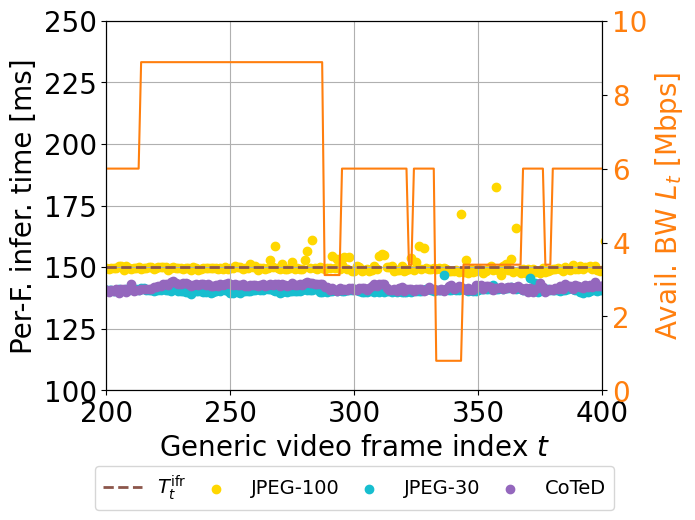

In [120]:
fig, ax1 = plt.subplots()
ax1.hlines(y=150,xmin=200, xmax=400,color="tab:brown",linestyles="--", linewidth=2, label=r"$T^{\text{ifr}}_t$")

ax1.scatter(high_jpeg_time_df["frame_id"], high_jpeg_time_df["overall_est"]-19, label="JPEG-100",color="gold")
ax1.scatter(low_jpeg_time_df["frame_id"], low_jpeg_time_df["overall_est"]-25, label="JPEG-30",color="tab:cyan")
ax1.scatter(jpeg_time_df["frame_id"], jpeg_time_df["overall_est"]-8, label="CoTeD",color="tab:purple")
# ax1.scatter(normal_time_df["frame_id"], normal_time_df["overall_est"], label="Scen-2",color="tab:cyan")
# ax1.scatter(no_jpeg_time_df["frame_id"], no_jpeg_time_df["overall_est"], label="Scen-3",color="tab:olive")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(jpeg_cha_df["frame_id"].to_numpy(),jpeg_cha_df["bandwidth"]/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim([100, 250])
ax1.set_xlim([200,400])
ax2.set_ylim([0,10])
ax1.grid()
ax1.set_ylabel("Per-F. infer. time [ms]")
ax1.set_xlabel('Generic video frame index $t$')
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=14,  columnspacing=0.5)
# plt.savefig("../figures/inference_time_scen1.pdf", bbox_inches='tight')
